In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Impulso**


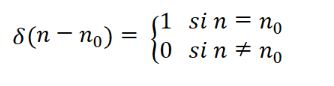

In [ ]:
def impseq(n0,n1,n2): #Genera una señal impulso unitario discreto entre los índices n1 y n2, con un valor de 1 en n0.
    n = np.arange (n1,n2+1)
    x = (n-n0) == 0 # Crea un array booleano donde el valor es True solo en el índice n0
    return [x,n] # Retorna una lista que contiene el array booleano y el array de índices

In [ ]:
[x,n] = impseq(0,-2,3)
x
n

array([-2, -1,  0,  1,  2,  3])

Text(0, 0.5, 'δ(n)')

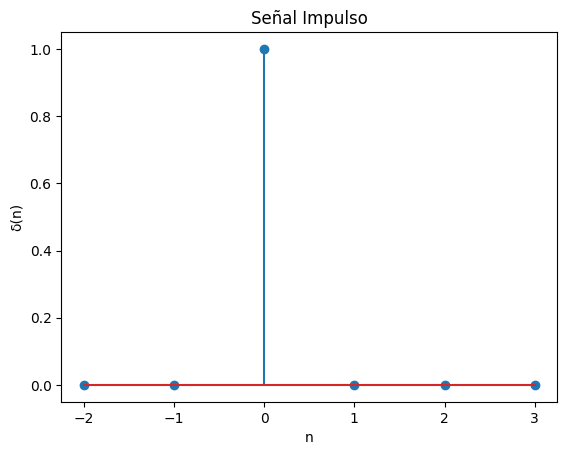

In [ ]:
plt.stem(n,x)
plt.title('Señal Impulso')
plt.xlabel('n')
plt.ylabel('δ(n)')

**Escalón Unitario**

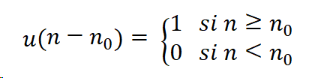


In [ ]:
def escalon(n0,n1,n2):  #Genera una señal escalón unitario discreto entre los índices n1 y n2, con un valor de 1 para n >= n0 y 0 para n < n0.
    n = np.arange(n1,n2+1)
    u = (n< n0) == 0  # Crea un array booleano donde el valor es True para n >= n0 y False para n < n0

    return n, u


In [ ]:
n1,n2 = -4,10
n0 = 3


In [ ]:
n,u = escalon(n0,n1,n2)


Text(0, 0.5, 'u(n)')

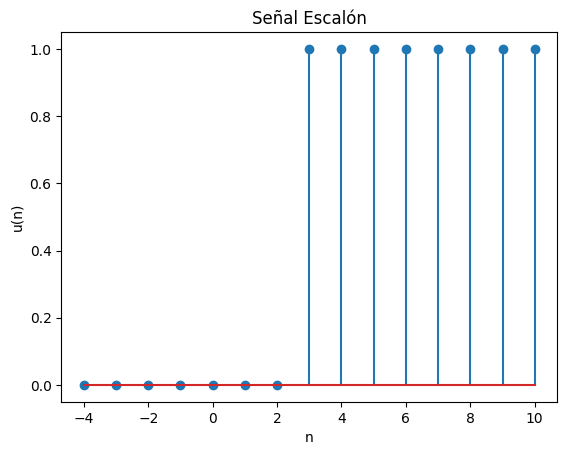

In [ ]:
plt.stem(n,u)
plt.title('Señal Escalón')
plt.xlabel('n')
plt.ylabel('u(n)')

**Rampa**

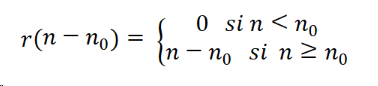

In [ ]:
def rampa(n0, n1, n2, m): # Genera una señal de rampa discreta entre los índices n1 y n2, con una pendiente m y un desplazamiento n0.
    n = np.arange(n1, n2+1)
    x = np.zeros(len(n))  # Inicializa un array de ceros con la longitud de n
    x[n>=n0] = m*(n[n>=n0] - n0)  # Asigna valores a x usando la fórmula de la rampa
    return x, n

In [ ]:
n1 = -5
n2 = 5
m = 2
n0 = 0

n, x = rampa(n0, n1, n2, m)

In [ ]:
n,x = rampa(n0,n1,n2,m)

Text(0, 0.5, 'r(n)')

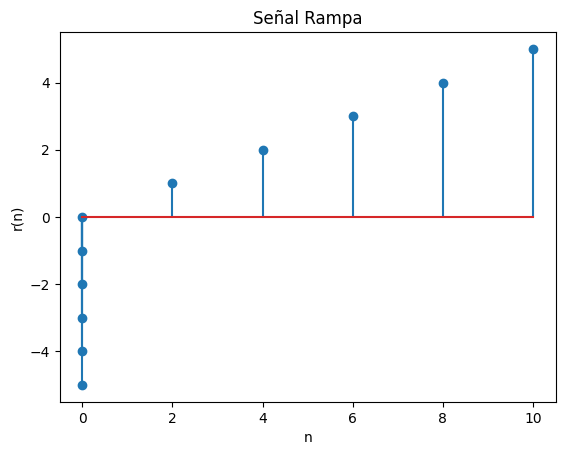

In [ ]:
plt.stem(n,x)
plt.title('Señal Rampa')
plt.xlabel('n')
plt.ylabel('r(n)')


**3. a. 𝑥1(𝑛)= 3𝛿(𝑛+1)+5𝛿(𝑛+3)+3𝛿(𝑛+2)+3𝛿(𝑛)+ 𝛿(𝑛)**.

In [ ]:
n = np.arange(-5, 6) # Crear un array de índices desde -5 hasta 6 (12 elementos en total)
#suma ponderada de varias señales impulso. Cada término de la suma es una señal impulso multiplicada por su respectiva amplitud
x1 = 3*impseq(1, -5, 5)[0] + 5*impseq(3, -5, 5)[0] + 3*impseq(2, -5, 5)[0] + 3*impseq(0, -5, 5)[0] + impseq(0, -5, 5)[0]



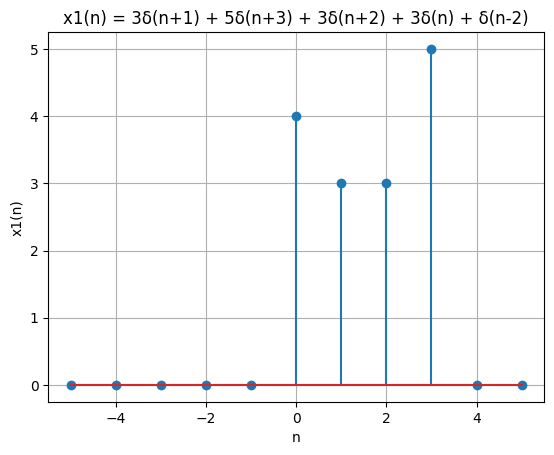

In [ ]:
plt.stem(n, x1)
plt.xlabel('n')
plt.ylabel('x1(n)')
plt.title('x1(n) = 3δ(n+1) + 5δ(n+3) + 3δ(n+2) + 3δ(n) + δ(n-2)')
plt.grid()
plt.show()

3.b

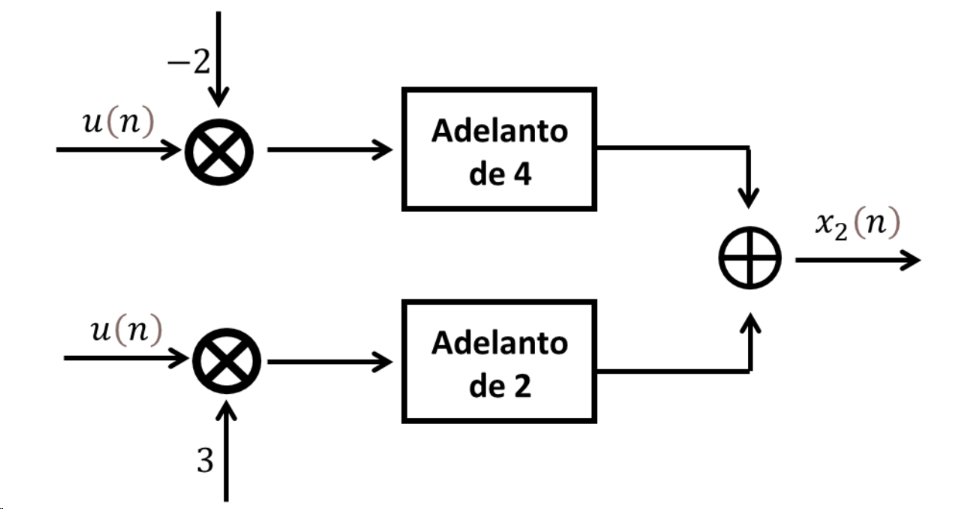

In [ ]:
n = np.arange(-6, 7) # Crear un array de índices desde 6 hasta -6 (13 elementos en total)
#Utilizamos la función escalon para generar dos señales escalón y luego las combinamos con coeficientes para obtener la secuencia final.
x2 = -2*escalon(0, -6, 6)[0] - 3*escalon(-3, -6, 6)[0]

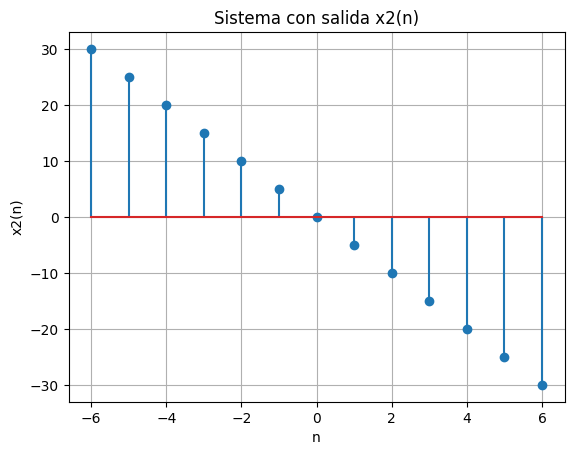

In [ ]:
plt.stem(n, x2)
plt.xlabel('n')
plt.ylabel('x2(n)')
plt.title('Sistema con salida x2(n)')
plt.grid()
plt.show()

3.c

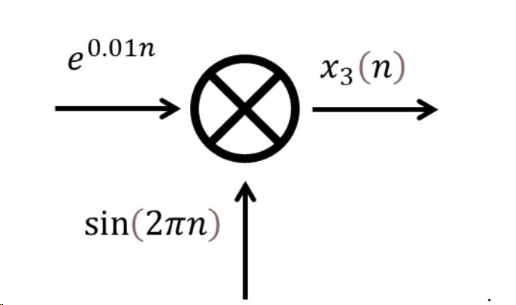

In [ ]:
n = np.arange(0, 101) # Creo un array de índices desde 0 hasta 100 (101 elementos en total)
# calculao el seno de cada elemento del array resultante y lo multiplico la función exponencial para cada elemento del array
x3 = np.sin(2*np.pi*n) * np.exp(0.01*n)

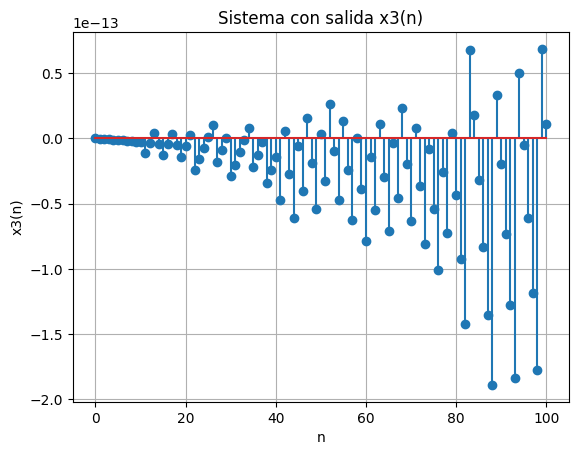

In [ ]:
plt.stem(n, x3)
plt.xlabel('n')
plt.ylabel('x3(n)')
plt.title('Sistema con salida x3(n)')
plt.grid()
plt.show()

**4.d. 𝑥4(𝑛)= 2𝑟(𝑛+3)−𝑟(𝑛−2)−5𝑢(𝑛−3),−10≤𝑛≤10**

In [ ]:
n = np.arange(-10, 11) # Creo un array de índices desde -10 hasta 10 (21 elementos en total)
x4 = 2*rampa(3, -10, 10,1)[0] - rampa(-2, -10, 10,1)[0] - 5*escalon(-3, -10, 10)[0] # Generar la secuencia x4(n) utilizando funciones de rampa y escalón

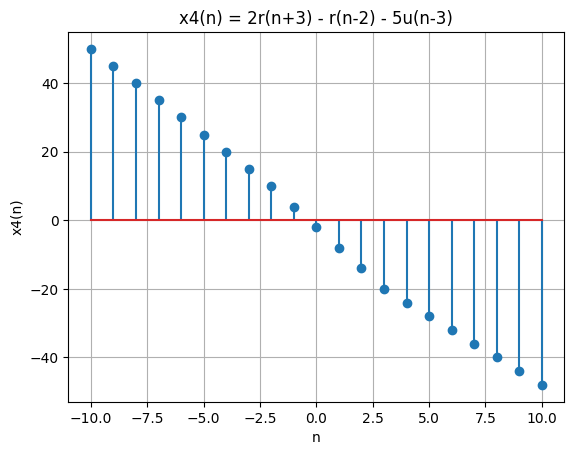

In [ ]:
plt.stem(n, x4)
plt.xlabel('n')
plt.ylabel('x4(n)')
plt.title('x4(n) = 2r(n+3) - r(n-2) - 5u(n-3)')
plt.grid()
plt.show()

**4. Genere la siguiente secuencia**

𝑥[𝑛]=

{𝑟[𝑛] 0≤𝑛≤5𝑟[𝑛−5]

 6≤𝑛≤11𝑟[𝑛−10]

 12≤𝑛≤17}

In [ ]:
n = np.arange(0, 18)
x = np.concatenate((rampa(0, 0, 5,10)[0],
                    rampa(0, 6, 11,2)[0],
                    rampa(0, 12, 17,5)[0]))

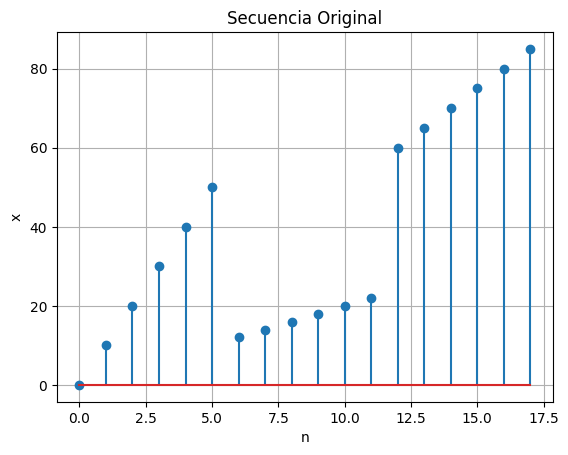

In [ ]:
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x')
plt.title('Secuencia Original')
plt.grid()
plt.show()




**a. Derive la secuencia**

In [ ]:
dx = np.diff(x)
dx = np.concatenate((dx, [0]))

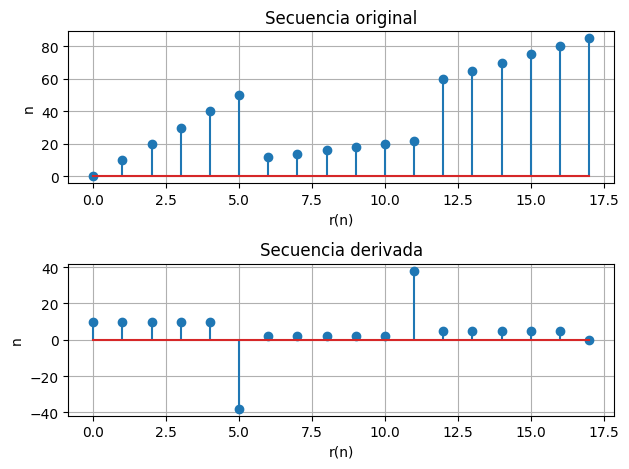

In [ ]:
plt.subplot(2,1,1)
plt.stem(n, x)
plt.title('Secuencia original')
plt.xlabel('r(n)')
plt.ylabel('n')
plt.grid()

plt.subplot(2,1,2)
plt.stem(n, dx)
plt.title('Secuencia derivada')
plt.grid()
plt.tight_layout()
plt.show()

**Descripción de la señal**

- En la parte superior, se muestra la secuencia original x[n], que tiene tres tramos de una rampa.
- En la parte inferior, se muestra la derivada discreta de la secuencia original, calculada como la diferencia entre elementos consecutivos de la secuencia original.

**Observaciones:**

- La secuencia original tiene tres tramos de una rampa, y cada tramo tiene una longitud de 6.
- La derivada discreta muestra picos en los puntos de inicio y final de cada tramo de la rampa original.
La derivada discreta es constante entre estos puntos, ya que la rampa tiene una pendiente constante en cada tramo.

**Por qué no es exactamente la derivada del caso continuo:**

La derivada discreta se aproxima a la derivada continua, pero hay diferencias notables. En el caso continuo, la derivada mide la tasa de cambio instantánea en cada punto, mientras que en el caso discreto, la derivada se calcula a partir de la diferencia entre valores discretos. La discretización introduce errores y limitaciones en la capacidad de representar cambios suaves. En este ejemplo, la derivada discreta refleja la tasa de cambio en los puntos de inicio y final de cada tramo de la rampa, pero no captura la variación continua de la tasa de cambio dentro de cada tramo.

**Punto 5
Sea 𝑥(𝑛)={0,1,2,3,4,5̂,4,3,2,1,0,1,2,3,4,5,5,5,5,10,10,10,10}. Genere la secuencia anterior y grafique los resultados. Use las funciones que generó antes para generar la secuencia concatenando secuencias más simples.**

In [ ]:
#𝑥(𝑛) = {0,1,2,3,4, 5̂, 4,3,2,1,0,1,2,3,4,5,5,5,5,10,10,10,10}

#n1 = np.arange(-5, 1)
#x1 = rampa(-5, -5, 0,1)[0]

#n2 = np.arange(1, 6)
#x2 = rampa(5, 1, 5,-1)[0]

#n3 = np.arange(6, 11)
#x3 = rampa(6, 6, 10,1)[0]

#n4 = np.arange(11, 21)
#x4 = np.ones(10)*5
#x4[0:5] = 10



n1 = np.arange(-5, 1)
x1 = rampa(-5, -5, 0,1)[0]

n2 = (1,2,3,4)
x2 = (4,3,2,1)

#n2 = np.arange(1, 5)
#x2 = rampa(4, 1, 4,-1)[0]

n3 = np.arange(5, 10)
x3 = rampa(5, 5, 9,1)[0]

n4 = np.arange(10, 14)
x4 = escalon(10, 10, 13)[1] * 5

n0 = n4 = np.arange(14, 19)
x0 = escalon(14, 14, 18)[1] * 10

In [ ]:
n = np.arange(-5, 19)
x = np.concatenate([x1, x2, x3, x4, x0])

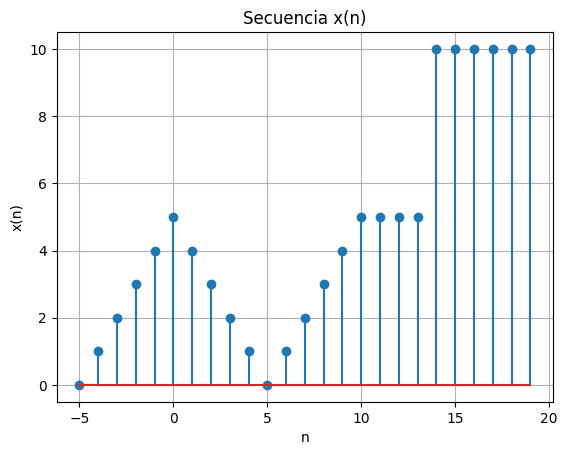

In [ ]:
plt.stem(n,x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Secuencia x(n)')
plt.grid()
plt.show()

a. 𝑥5(𝑛)=2𝑥(𝑛−4)+𝑥(𝑛)

In [ ]:
x5 = 2*x[n-4] + x[n]

b. 𝑥6(𝑛)=0.001𝑒0.5𝑛𝑥(𝑛)+10𝑠𝑖𝑛(0.05𝜋𝑛)𝑥(𝑛+2),−20≤𝑛≤20

In [ ]:
x6 = 0.001*np.exp(0.5*n)*x[n] + 10*np.sin(0.05*np.pi*n)*x[n+2]

Gráfica de las señales

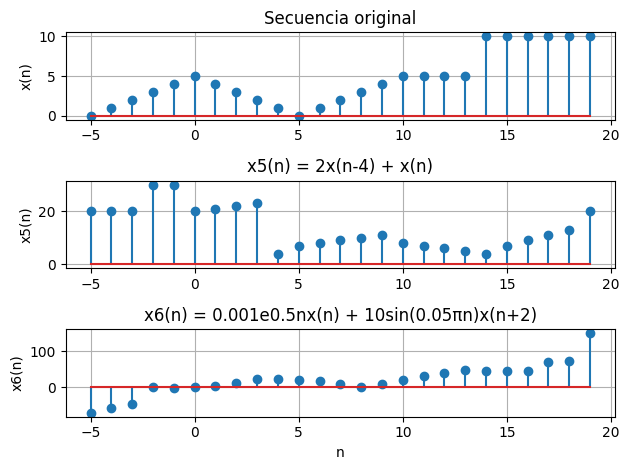

In [ ]:
plt.subplot(3,1,1)
plt.stem(n, x)
plt.ylabel('x(n)')
plt.title('Secuencia original')
plt.grid()

plt.subplot(3,1,2)
plt.stem(n, x5)
plt.ylabel('x5(n)')
plt.title('x5(n) = 2x(n-4) + x(n)')
plt.grid()

plt.subplot(3,1,3)
plt.stem(n, x6)
plt.ylabel('x6(n)')
plt.title('x6(n) = 0.001e0.5nx(n) + 10sin(0.05πn)x(n+2)')
plt.xlabel('n')
plt.grid()
plt.tight_layout()
plt.show()